In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            2278 non-null   object
 1   Condition      2278 non-null   object
 2   Date           2278 non-null   object
 3   Drug           2278 non-null   object
 4   DrugId         2278 non-null   int64 
 5   EaseofUse      2278 non-null   int64 
 6   Effectiveness  2278 non-null   int64 
 7   Reviews        2278 non-null   object
 8   Satisfaction   2278 non-null   int64 
 9   Sex            2278 non-null   object
 10  Sides          2278 non-null   object
 11  UsefulCount    2278 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 213.7+ KB


In [3]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [4]:
df = df.drop_duplicates('Reviews')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 2274
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            1363 non-null   object        
 1   Condition      1363 non-null   object        
 2   Date           1363 non-null   datetime64[ns]
 3   Drug           1363 non-null   object        
 4   DrugId         1363 non-null   int64         
 5   EaseofUse      1363 non-null   int64         
 6   Effectiveness  1363 non-null   int64         
 7   Reviews        1363 non-null   object        
 8   Satisfaction   1363 non-null   int64         
 9   Sex            1363 non-null   object        
 10  Sides          1363 non-null   object        
 11  UsefulCount    1363 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 138.4+ KB


In [5]:
#Only Drugs with more than 10 reviews
Drug = []
for i in df['Drug'].unique():
    if np.sum(df.Drug == i) >= 10:
        Drug.append(i)

tmp = []

for drugs in df['Drug']:
    if drugs in Drug:
        tmp.append(1)
    else:
        tmp.append(0)

df['temp'] = tmp
df = df[df['temp'] == 1]

# All Osteoporosis Illnesses

In [6]:
print('number of reviews: ', df.shape)
print("number of males: ", sum(df['Sex'] == 'Male'))
print("number of females: ", sum(df['Sex'] == 'Female'))
print('list of conditions: \n', df['Condition'].unique())
print('number of conditions: ', df['Condition'].unique().shape)
print('number of drugs: ', df['Drug'].unique().shape)

number of reviews:  (1227, 13)
number of males:  64
number of females:  1006
list of conditions: 
 ['Osteoporosis' 'Osteoporosis in Male Patient'
 'Aromatase Inhibitor Drug-Induced Osteoporosis'
 'Osteoporosis in Men due to Deficient Function of Testis'
 'Post-Menopausal Osteoporosis Prevention'
 'osteoporosis in postmenopausal woman at high risk for fracture'
 'Osteoporosis caused by Glucocorticoid Drugs'
 'Glucocorticoid-Induced Osteoporosis Prevention'
 'Osteoporosis caused by Anti-Androgen Drugs']
number of conditions:  (9,)
number of drugs:  (14,)


# ONLY Osteoporosis

In [7]:
df_ost = df[df['Condition'] == "Osteoporosis"]
df_ost['Year'] = df_ost['Date'].dt.year

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_36752\1355743546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost['Year'] = df_ost['Date'].dt.year


In [8]:
print('number of reviews: ', df_ost.shape)
print("number of males: ", sum(df_ost['Sex'] == 'Male'))
print("number of females: ", sum(df_ost['Sex'] == 'Female'))
print('list of conditions: \n', df_ost['Condition'].unique())
print('number of conditions: ', df_ost['Condition'].unique().shape)
print('number of drugs: ', df_ost['Drug'].unique().shape)
print(min(df_ost['Date']))
print(max(df_ost['Date']))

number of reviews:  (838, 14)
number of males:  33
number of females:  672
list of conditions: 
 ['Osteoporosis']
number of conditions:  (1,)
number of drugs:  (7,)
2007-09-18 00:00:00
2020-02-24 00:00:00


In [9]:
#Recoding Age
df_ost["Age"] = df_ost["Age"].replace(
    ["25-34","45-54","65-74","75 or over","55-64","35-44","19-24","13-18","7-12", ""], 
    ["25-34","45-54", "65-74", "75+", "55-64", "35-44", "19-24", "13-18", "7-12", "Blank"])

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_36752\2927260191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost["Age"] = df_ost["Age"].replace(


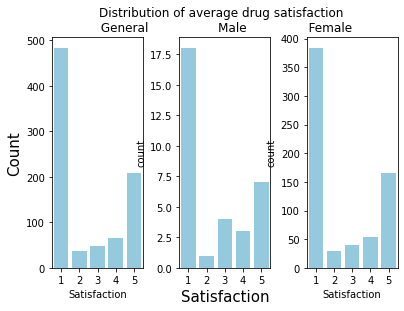

In [10]:
fig, axs = plt.subplots(ncols=3)
sns.countplot(x="Satisfaction", color = 'skyblue', data = df_ost, ax = axs[0])
sns.countplot(x="Satisfaction", color = 'skyblue', data = df_ost[df_ost['Sex'] == 'Male'], ax = axs[1])
sns.countplot(x="Satisfaction", color = 'skyblue', data = df_ost[df_ost['Sex'] == 'Female'], ax = axs[2])
axs[1].set_xlabel('Satisfaction', fontsize = 15)
axs[0].set_ylabel('Count', fontsize = 15)
axs[1].set_title('Distribution of average drug satisfaction  \n General                  Male                Female')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [11]:
df_ost.groupby("Drug")["Satisfaction"].mean().sort_values(ascending = False).reset_index()

,Drug,Satisfaction
0,"reclast bottle, infusion",2.772059
1,actonel 35 mg tablet,2.333333
2,zometa vial,2.181818
3,prolia syringe,2.039370
4,actonel tablet osteoporosis agents,1.968421
5,atelvia,1.891304
6,zoledronic acid vial,1.666667


<AxesSubplot:xlabel='Year', ylabel='Satisfaction'>

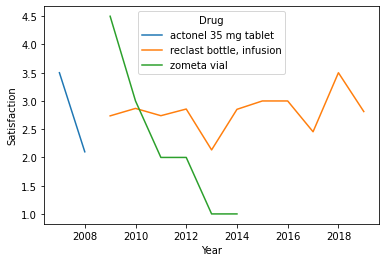

In [12]:
df_drug_reclast = df_ost.loc[df_ost['Drug'].str.contains("reclast bottle, infusion", case=False)]
df_drug_zometa = df_ost.loc[df_ost['Drug'].str.contains("actonel 35 mg tablet", case=False)]
df_drug_prolia = df_ost.loc[df_ost['Drug'].str.contains("zometa vial", case=False)]
#df_drug4 = df_ost.loc[df_ost['Drug'].str.contains("actonel 35 mg tablet", case=False)]

df_drugs = pd.concat([df_drug_reclast,df_drug_zometa,df_drug_prolia])

sns.lineplot(x = 'Year', y = 'Satisfaction', hue = 'Drug', data=df_drugs.groupby(["Year", "Drug"])["Satisfaction"].mean().reset_index())

<AxesSubplot:title={'center':'Ratings Across Age Group'}, xlabel='Age', ylabel='count'>

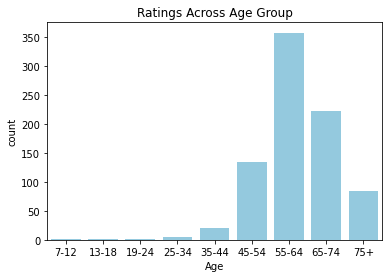

In [13]:
plt.title('Ratings Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["7-12", "13-18", "19-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"])

# Bin 0-54, 55-64, 65+

In [14]:
bin_age = []

for age in df_ost['Age']:
    if age == '7-12':
        bin_age.append('0-54')
    elif age == '13-18':
        bin_age.append('0-54')
    elif age == '19-24':
        bin_age.append('0-54')
    elif age == '25-34':
        bin_age.append('0-54')
    elif age == '35-44':
        bin_age.append('0-54')
    elif age == '45-54':
        bin_age.append('0-54')
    elif age == '55-64':
        bin_age.append('55-64')
    elif age == '65-74':
        bin_age.append('65+')
    elif age == '75+':
        bin_age.append('65+')
    else:
        bin_age.append('Blank')

df_ost['Age'] = bin_age

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_36752\830314741.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost['Age'] = bin_age


<AxesSubplot:title={'center':'Count Across Age Group'}, xlabel='Age', ylabel='count'>

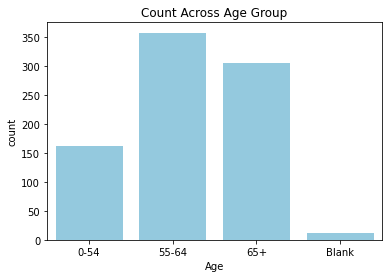

In [15]:
plt.title('Count Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["0-54", "55-64", "65+", "Blank"])

<AxesSubplot:title={'center':'Ratings for Women Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

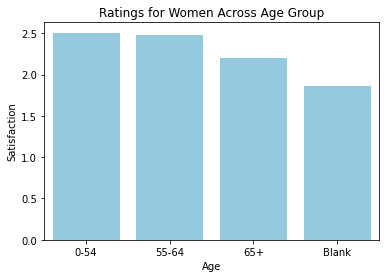

In [16]:
plt.title('Ratings for Women Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost[df_ost['Sex'] == 'Female'].groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

<AxesSubplot:title={'center':'Ratings for Men Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

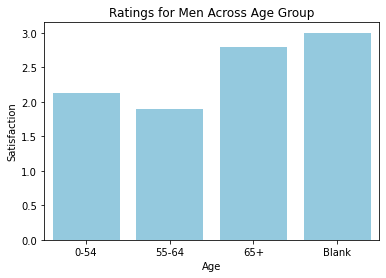

In [17]:
plt.title('Ratings for Men Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost[df_ost['Sex'] == 'Male'].groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

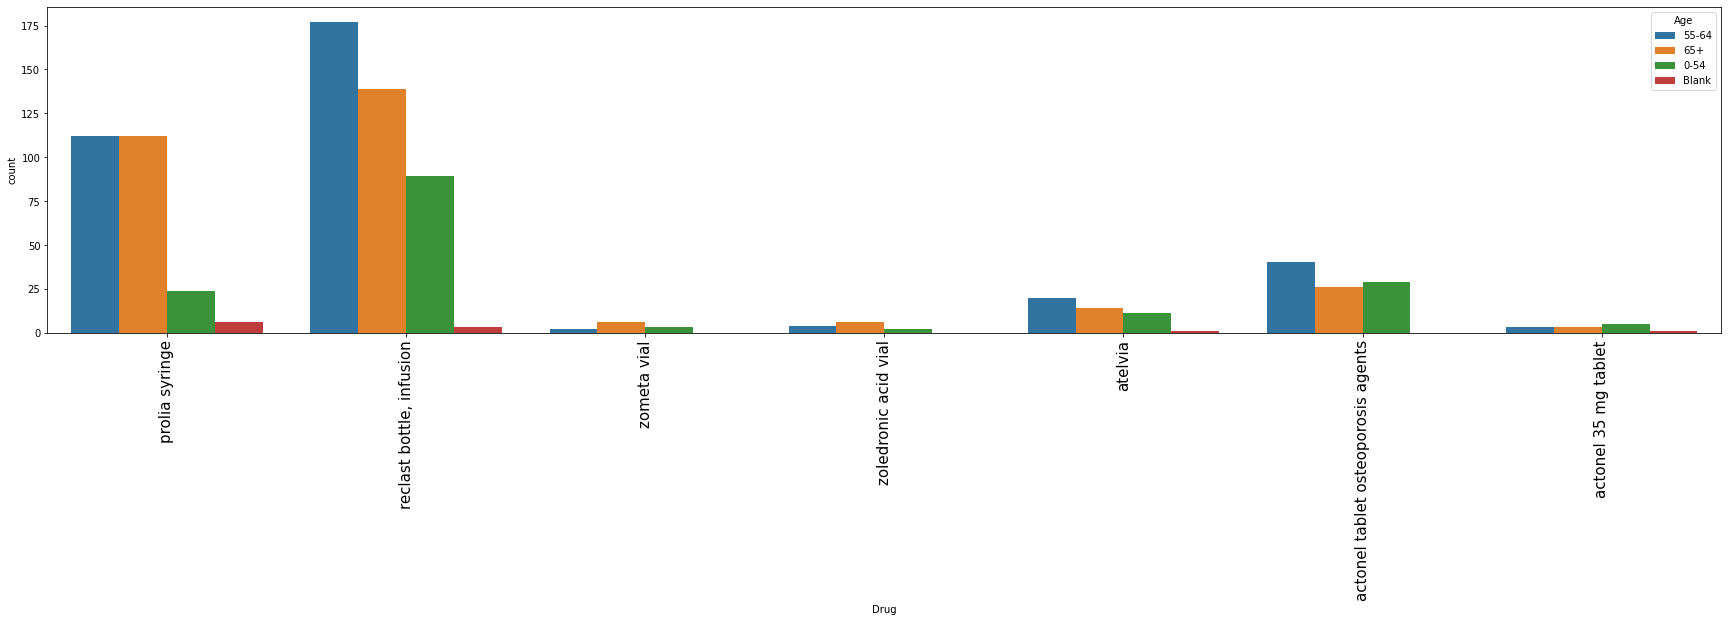

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_count = sns.countplot(x = 'Drug', hue = 'Age', data = df_ost)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

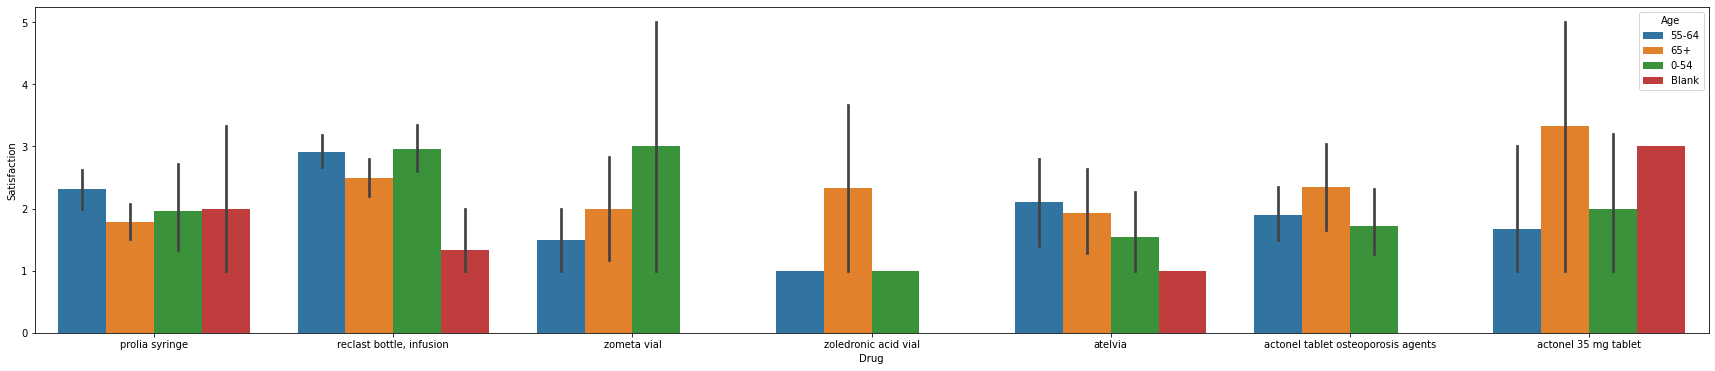

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_bar = sns.barplot(x = 'Drug', y = 'Satisfaction', hue = 'Age', data = df_ost)
#sns_bar = sns.barplot(x='Drug', y = 'Satisfaction', hue = 'Age', data = df_ost_female_45)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

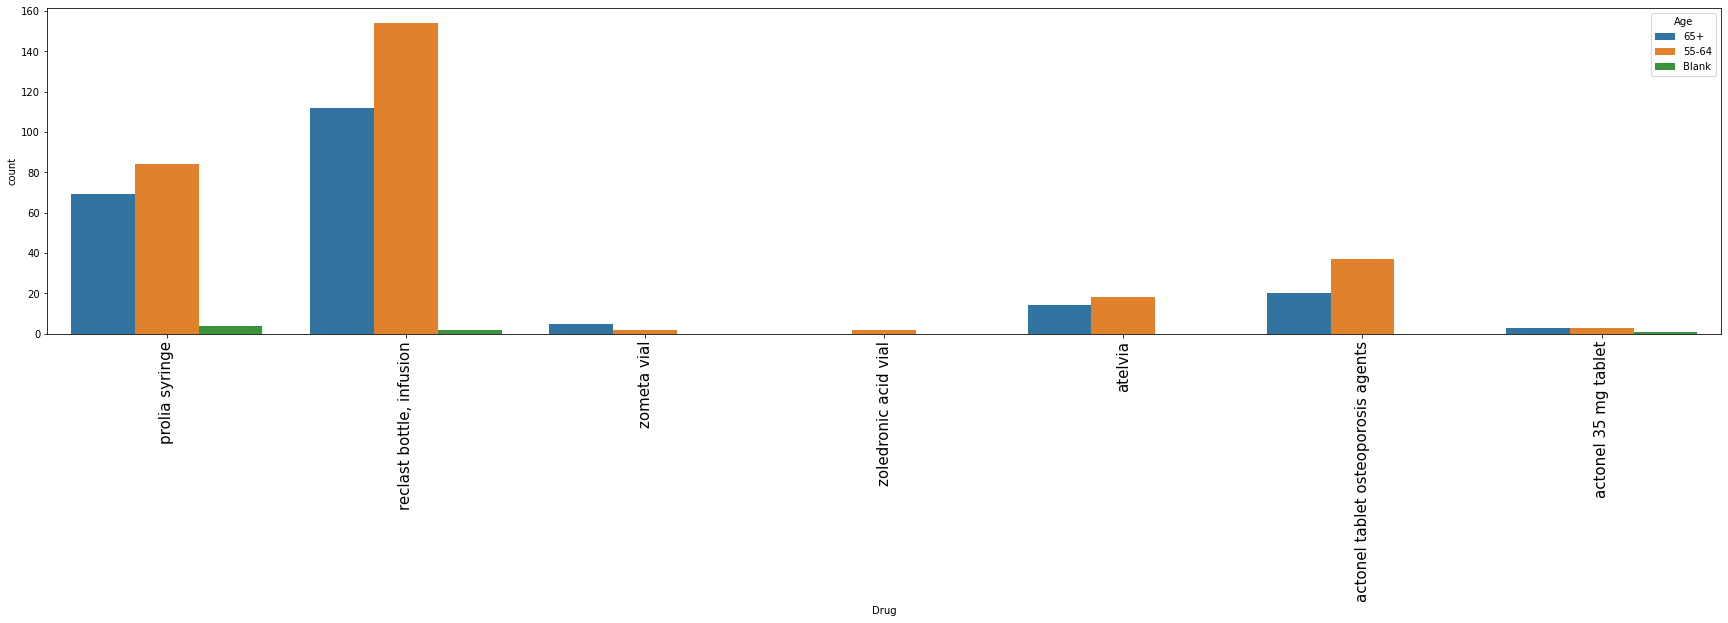

In [20]:
df_ost_female_45 = df_ost[df_ost['Sex'] == 'Female'][df_ost[df_ost['Sex'] == 'Female']['Age'] != '0-54']

fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_count = sns.countplot(x = 'Drug', hue = 'Age', data = df_ost_female_45)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

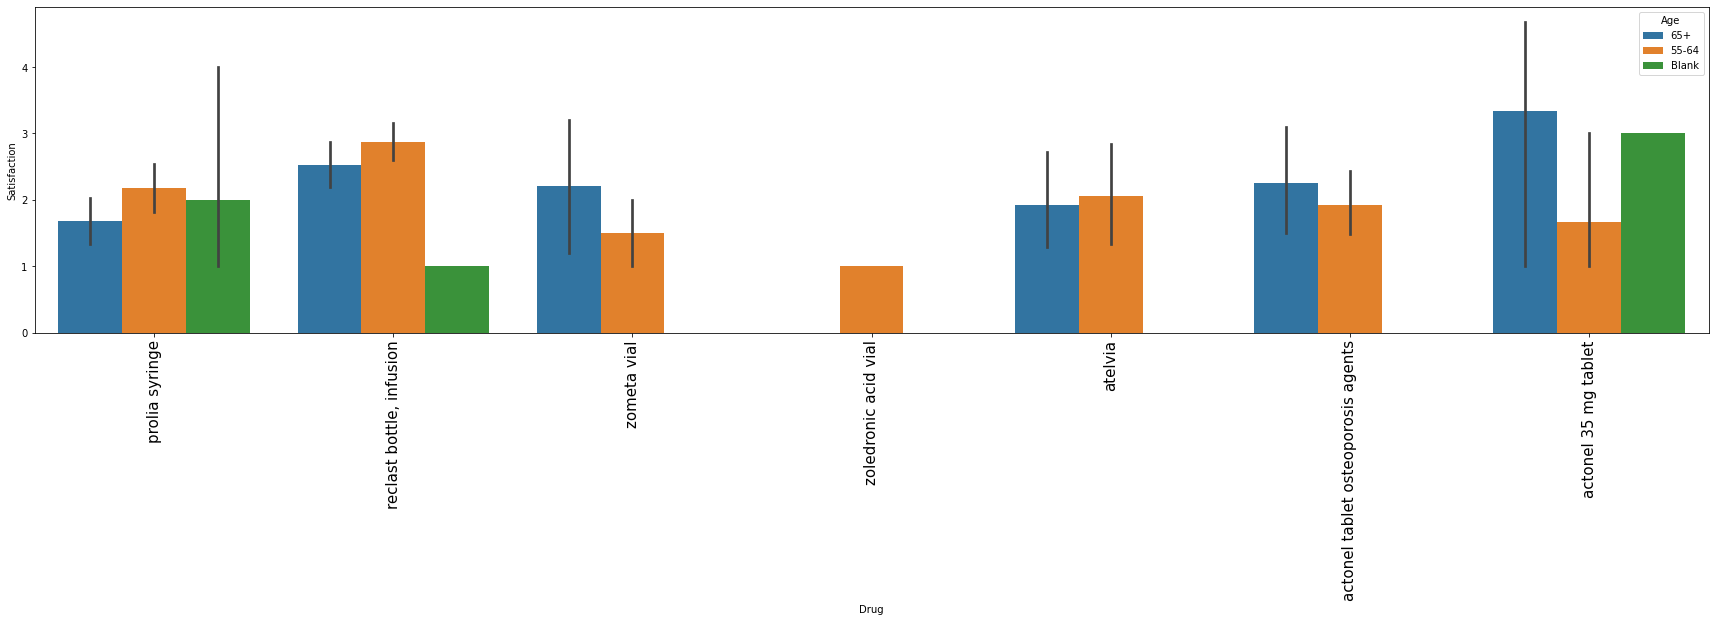

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_bar = sns.barplot(x='Drug', y = 'Satisfaction', hue = 'Age', data = df_ost_female_45)
plt.setp(sns_bar.get_xticklabels(), rotation=90, fontsize = 15);

# Bin 0-55 and 55+

In [22]:
df_ost['Age'].unique()

array(['55-64', '65+', '0-54', 'Blank'], dtype=object)

In [23]:
bin_age2 = []

for age in df_ost['Age']:
    if age == '0-54':
        bin_age2.append('0-54')
    elif age == '55-64':
        bin_age2.append('55+')
    elif age == '65+':
        bin_age2.append('55+')
    else:
        bin_age2.append('Blank')

df_ost_new = df_ost
df_ost_new['Age'] = bin_age2

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_36752\1242855889.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost_new['Age'] = bin_age2


<AxesSubplot:title={'center':'Count Across Age Group'}, xlabel='Age', ylabel='count'>

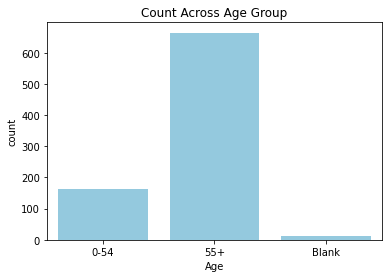

In [24]:
plt.title('Count Across Age Group')
sns.countplot(x = 'Age', data = df_ost_new, color = 'skyblue', order=["0-54", "55+", "Blank"])

<AxesSubplot:title={'center':'Ratings for Women Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

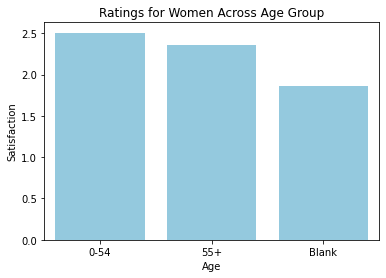

In [25]:
df_ost_female_new = df_ost_new[df_ost_new['Sex'] == 'Female']
plt.title('Ratings for Women Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost_female_new.groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

<AxesSubplot:title={'center':'Ratings for Men Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

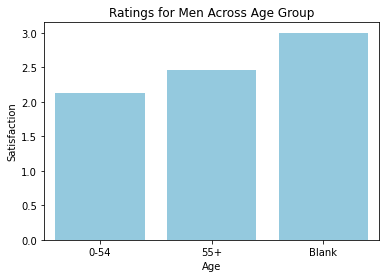

In [26]:
df_ost_male_new = df_ost_new[df_ost_new['Sex'] == 'Male']
plt.title('Ratings for Men Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost_male_new.groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

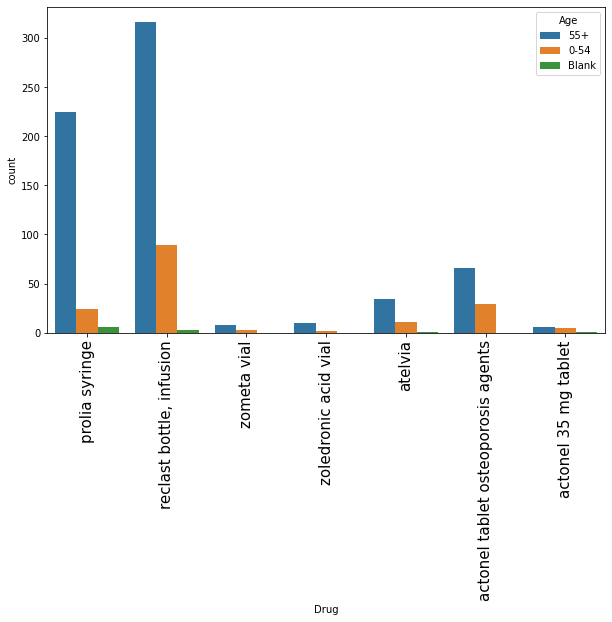

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns_count = sns.countplot(x = 'Drug', hue = 'Age', data = df_ost_new)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

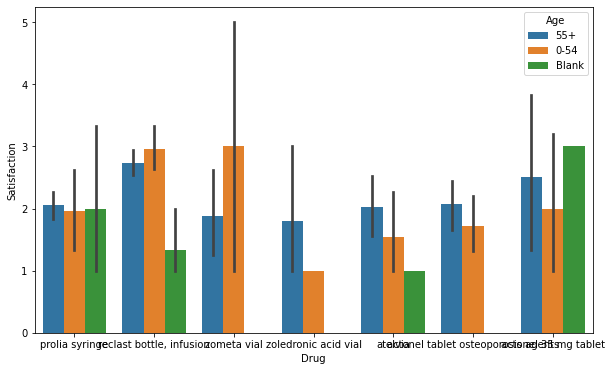

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns_bar = sns.barplot(x = 'Drug', y = 'Satisfaction', hue = 'Age', data = df_ost_new)
#sns_bar = sns.barplot(x='Drug', y = 'Satisfaction', hue = 'Age', data = df_ost_female_45)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

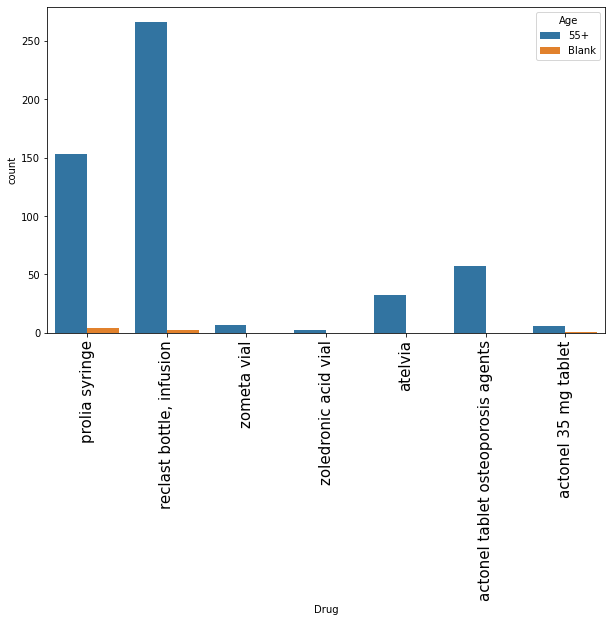

In [29]:
df_ost_female_45_new = df_ost_female_new[df_ost_female_new['Age'] != '0-54']

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns_count = sns.countplot(x = 'Drug', hue = 'Age', data = df_ost_female_45_new)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

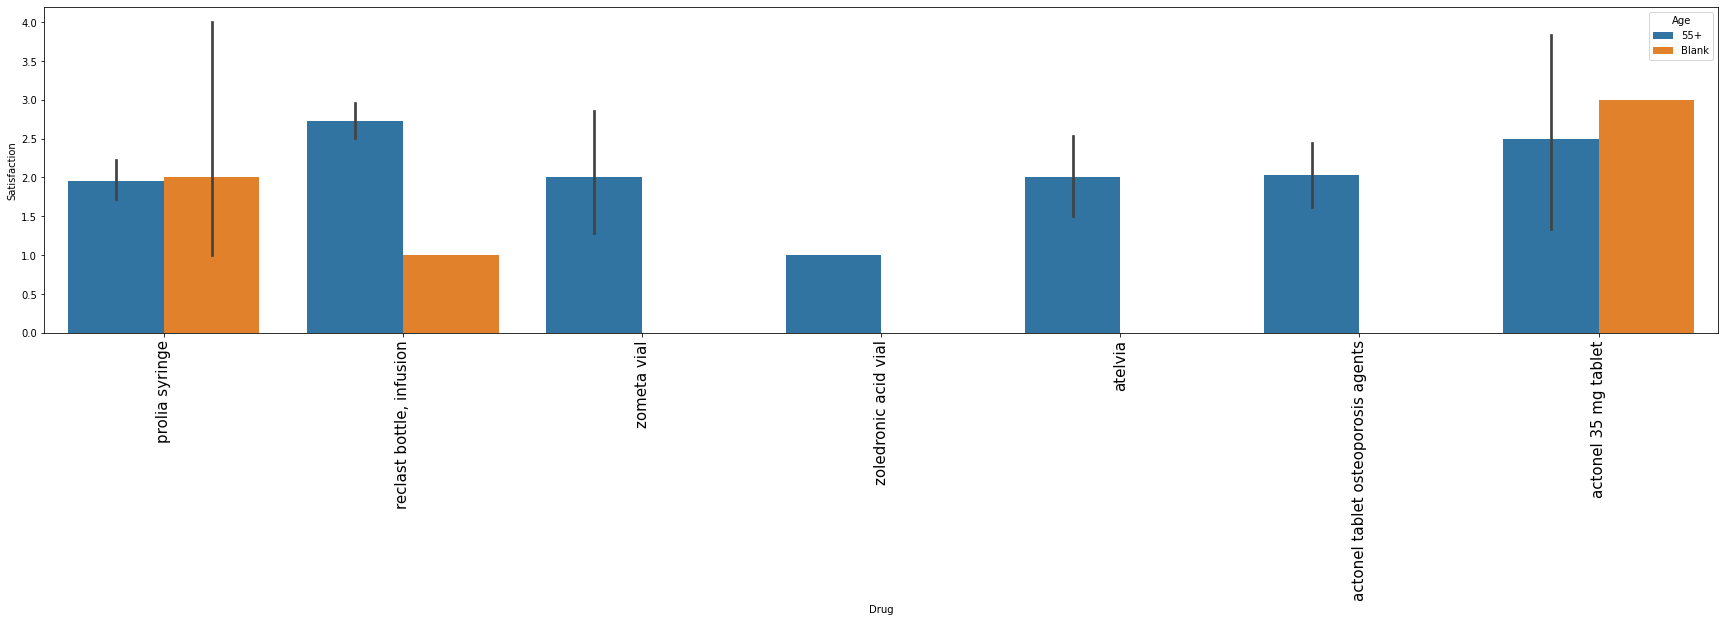

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_bar = sns.barplot(x='Drug', y = 'Satisfaction', hue = 'Age', data = df_ost_female_45_new)
plt.setp(sns_bar.get_xticklabels(), rotation=90, fontsize = 15);

# Miscellaneous

Text(0.5, 1.0, 'Top: The number of drugs per condition.')

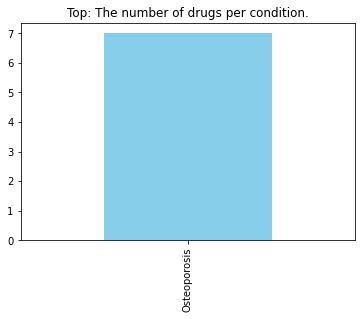

In [31]:
condition_dn = df_ost.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar",color="skyblue")
plt.xlabel("")
plt.ylabel("")
plt.title("Top: The number of drugs per condition.")

#figsize = (14,6), fontsize = 10,

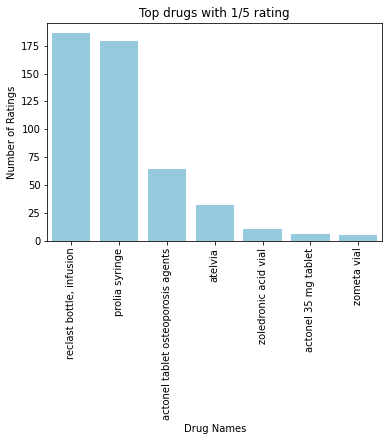

In [32]:
# This barplot shows the Top 20 drugs with the 1/5 rating

# Setting the Parameter
#sns.set(font_scale = 1.2, style = 'darkgrid')
#plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_ost.loc[df_ost.Satisfaction == 1, "Drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], color = 'skyblue')

sns_rating.set_title('Top drugs with 1/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [33]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in df_ost.Condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in df_ost[df_ost.Condition == i].Drug.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(df_ost.Drug == j) >= 10:
            temp_ls.append((j, np.sum(df_ost[df_ost.Drug == j].Satisfaction) / np.sum(df_ost.Drug == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

# Group Review by 3 Years

In [34]:
df_drugs.groupby(['Drug','Year'])['Satisfaction'].agg(count='size', mean='mean').reset_index()

,Drug,Year,count,mean
0,actonel 35 mg tablet,2007,2,3.500000
1,actonel 35 mg tablet,2008,10,2.100000
2,"reclast bottle, infusion",2009,72,2.736111
3,"reclast bottle, infusion",2010,106,2.867925
4,"reclast bottle, infusion",2011,69,2.739130
5,"reclast bottle, infusion",2012,14,2.857143
6,"reclast bottle, infusion",2013,30,2.133333
7,"reclast bottle, infusion",2014,27,2.851852
8,"reclast bottle, infusion",2015,30,3.000000
9,"reclast bottle, infusion",2016,12,3.000000
